# Individual Capstone Project at General Assembly 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Food Security & Cost/Affordability of a Healthy Diet - FAOSTAT

Dataset 1: 'merged_fao_food_security_and_cost_affordability_healthy_diet_coahd.csv' by FAOSTAT

## Data Cleaning

In [2]:
merged_fao = pd.read_csv('./final_datasets/merged_fao_food_security_and_cost_affordability_healthy_diet_coahd.csv', low_memory=False)
merged_fao.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20002002,2000-2002,%,88,E,NaN
1,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20012003,2001-2003,%,89,E,NaN
2,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20022004,2002-2004,%,92,E,NaN
3,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20032005,2003-2005,%,93,E,NaN
4,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20042006,2004-2006,%,94,E,NaN


In [3]:
merged_fao.Flag.unique()

array(['E', 'X', 'A', 'Q', 'O'], dtype=object)

A	Official figure

E	Estimated value

X Figure from international organizations

O	Missing value

Q	Missing value; suppressed

In [4]:
merged_fao.shape

(237895, 13)

In [5]:
merged_fao.dtypes

Area Code           int64
Area Code (M49)    object
Area               object
Item Code          object
Item               object
Element Code        int64
Element            object
Year Code           int64
Year               object
Unit               object
Value              object
Flag               object
Note               object
dtype: object

In [6]:
merged_fao.isna().sum()

Area Code               0
Area Code (M49)         0
Area                    0
Item Code               0
Item                    0
Element Code            0
Element                 0
Year Code               0
Year                    0
Unit                 4074
Value               33323
Flag                    0
Note               206711
dtype: int64

In [7]:
# Filter out missings for 'Value'
merged_fao.loc[merged_fao['Value'].isnull(), :] #.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
1960,4,'012,Algeria,210011,Number of people undernourished (million) (3-y...,6132,Value,20172019,2017-2019,million No,NaN,Q,NaN
1961,4,'012,Algeria,210011,Number of people undernourished (million) (3-y...,6132,Value,20182020,2018-2020,million No,NaN,Q,NaN
1962,4,'012,Algeria,210011,Number of people undernourished (million) (3-y...,6132,Value,20192021,2019-2021,million No,NaN,Q,NaN
1963,4,'012,Algeria,210011,Number of people undernourished (million) (3-y...,6132,Value,20202022,2020-2022,million No,NaN,Q,NaN
2756,5,'016,American Samoa,210041,Prevalence of undernourishment (percent) (3-ye...,6121,Value,20002002,2000-2002,%,NaN,E,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236818,181,'716,Zimbabwe,7005,Percentage of the population unable to afford ...,6121,Value,2021,2021,%,NaN,Q,NaN
236820,181,'716,Zimbabwe,7006,Number of people unable to afford a healthy di...,6132,Value,2018,2018,million No,NaN,Q,NaN
236821,181,'716,Zimbabwe,7006,Number of people unable to afford a healthy di...,6132,Value,2019,2019,million No,NaN,Q,NaN
236822,181,'716,Zimbabwe,7006,Number of people unable to afford a healthy di...,6132,Value,2020,2020,million No,NaN,Q,NaN


In [8]:
# Filter out missings for 'Unit'
merged_fao.loc[merged_fao['Unit'].isnull(), :] #.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
451,2,'004,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2000,2000,NaN,-2.44,X,NaN
452,2,'004,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2002,2002,NaN,-2.04,X,NaN
453,2,'004,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2003,2003,NaN,-2.2,X,NaN
454,2,'004,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2004,2004,NaN,-2.3,X,NaN
455,2,'004,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2005,2005,NaN,-2.07,X,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173331,181,'716,Zimbabwe,21032,Political stability and absence of violence/te...,6125,Value,2017,2017,NaN,-0.71,X,NaN
173332,181,'716,Zimbabwe,21032,Political stability and absence of violence/te...,6125,Value,2018,2018,NaN,-0.72,X,NaN
173333,181,'716,Zimbabwe,21032,Political stability and absence of violence/te...,6125,Value,2019,2019,NaN,-0.96,X,NaN
173334,181,'716,Zimbabwe,21032,Political stability and absence of violence/te...,6125,Value,2020,2020,NaN,-1.07,X,NaN


In [9]:
len(merged_fao[(merged_fao['Unit'].isnull()) & (merged_fao['Item'] == 'Political stability and absence of violence/terrorism (index)')])

4074

In [10]:
# Since all of the empty rows in Unit are equal to 'Political stability and absence of violence/terrorism (index)'
# Then replace null Unit with Index per FAO data dictionary
# also it says Index in it's column title 
# Factor = 1 for this per FAO data dictionary
# empty Unit should be Index in this case

# Replaced NaN with the word 'Index'
merged_fao['Unit'].fillna('Index', inplace=True)

In [11]:
# drop empty rows in Value column, since no use for these rows if theres no value in them. 
merged_fao.dropna(subset=['Value'], inplace=True)

In [12]:
# Now down to 0 nulls (except for Note, which is ok, since that is just a reference column)
merged_fao.isna().sum() 

Area Code               0
Area Code (M49)         0
Area                    0
Item Code               0
Item                    0
Element Code            0
Element                 0
Year Code               0
Year                    0
Unit                    0
Value                   0
Flag                    0
Note               173388
dtype: int64

In [13]:
merged_fao.Note.unique()

array([nan, 'FAO data', 'Official estimate',
       'Official estimate integrated with FAO data',
       'The UNICEF-WHO low birthweight estimates are derived through standard methodology applied to all countries to ensure comparability and are not the official statistics of the Government of India. India\x92s most recent national official low birthweight prevalence is 18.2 percent from the 2019-2021 National Family Health Survey-5 (NFHS-5), which is used as the basis of the UNICEF-WHO global estimation model to support cross-country comparability.',
       'The UNICEF-WHO low birthweight estimates are derived through standard methodology applied to all countries to ensure comparability and are not the official statistics of the Government of India. India\x92s most recent national official low birthweight preval'],
      dtype=object)

In [14]:
merged_fao.Element.unique()

array(['Value', 'Confidence interval: Lower bound',
       'Confidence interval: Upper bound'], dtype=object)

Definition for "Value": 

could be a bunch of different values


Definition for "Confidence interval: Lower bound": 

Domain Code FS
DomainFood Security and Nutrition: Suite of Food Security Indicators
Element Code 61211
Unit %

Domain Code FS
Domain Food Security and Nutrition: Suite of Food Security Indicators
Element Code 61321
Element Confidence interval: Lower bound
Unit million No

Definition for "Confidence interval: Upper bound":

Domain Code FS
Domain Food Security and Nutrition: Suite of Food Security Indicators
Element Code 61322
Unit million No

Domain Code FS
Domain Food Security and Nutrition: Suite of Food Security Indicators
Element Code 61212
Unit %

In [15]:
merged_fao.Flag.unique()

array(['E', 'X', 'A'], dtype=object)

When I got rid of the nulls in 'Unit' and 'Value' columns, it eliminated values in 'Flag' column that held
O - Missing value and Q - Missing value; suppressed, which is good for having more accurate data.

In [16]:
merged_fao.Item.unique()

array(['Average dietary energy supply adequacy (percent) (3-year average)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Prevalence of undernourishment (percent) (3-year average)',
       'Number of people undernourished (million) (3-year average)',
       'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of severe food insecurity in the male adult population (percent) (3-year average)',
       'Prevalence of severe food insecurity in the female adult population (percent) (3-year average)',
       'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of moderate or

In [17]:
merged_fao.columns

Index(['Area Code', 'Area Code (M49)', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Note'],
      dtype='object')

In [18]:
merged_fao.head(1)

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,20002002,2000-2002,%,88,E,NaN


In [19]:
# drop columns: Area Code (M49) & Year Code
merged_fao.drop(columns = ['Area Code (M49)', 'Year Code'], axis=1, inplace=True)

In [20]:
# make remaining column titles lowercase & replace blank spaces with _
merged_fao.columns=[col.lower().replace(" ","_") for col in merged_fao.columns]

# Rename the 'flag' column to 'flag_code'
merged_fao.rename(columns={'flag': 'flag_code'}, inplace=True)
merged_fao.columns

Index(['area_code', 'area', 'item_code', 'item', 'element_code', 'element',
       'year', 'unit', 'value', 'flag_code', 'note'],
      dtype='object')

In [21]:
# For easier understanding for myself and for users, duplicate the Flag column and write out description in the new column
flag = []

for index, row in merged_fao.iterrows():
    if row['flag_code'] == 'E':
        flag.append("Estimated Value")
    elif row['flag_code'] == 'X':
        flag.append("Figure from international organizations")
    else: 
        flag.append("Official Figure")

merged_fao['flag'] = flag

In [23]:
merged_fao.head(1)

,area_code,area,item_code,item,element_code,element,year,unit,value,flag_code,note,flag
0,2,Afghanistan,21010,Average dietary energy supply adequacy (percen...,6121,Value,2000-2002,%,88,E,NaN,Estimated Value


In [24]:
merged_fao.element.unique()

array(['Value', 'Confidence interval: Lower bound',
       'Confidence interval: Upper bound'], dtype=object)

In [25]:
# Drop some of the rows in 'item' that I won't be using
merged_fao.drop(merged_fao[merged_fao['item'].isin([
    'Prevalence of exclusive breastfeeding among infants 0-5 months of age',
    'Coefficient of variation of habitual caloric consumption distribution (real number)',
    'Incidence of caloric losses at retail distribution level (percent)',
    'Rail lines density (total route in km per 100 square km of land area)',
    'Average dietary energy supply adequacy (percent) (3-year average)',
       'Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)',
       'Average protein supply (g/cap/day) (3-year average)',
       'Average supply of protein of animal origin (g/cap/day) (3-year average)',
       'Gross domestic product per capita, PPP, (constant 2017 international $)',
       'Prevalence of undernourishment (percent) (3-year average)',
       'Number of people undernourished (million) (3-year average)',
       'Prevalence of severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of severe food insecurity in the male adult population (percent) (3-year average)',
       'Prevalence of severe food insecurity in the female adult population (percent) (3-year average)',
       'Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average)',
       'Prevalence of moderate or severe food insecurity in the male adult population (percent) (3-year average)',
       'Prevalence of moderate or severe food insecurity in the female adult population (percent) (3-year average)',
       'Number of severely food insecure people (million) (3-year average)',
       'Number of severely food insecure male adults (million) (3-year average)',
       'Number of severely food insecure female adults (million) (3-year average)',
       'Number of moderately or severely food insecure people (million) (3-year average)',
       'Number of moderately or severely food insecure male adults (million) (3-year average)',
       'Number of moderately or severely food insecure female adults (million) (3-year average)',
       'Cereal import dependency ratio (percent) (3-year average)',
       'Percent of arable land equipped for irrigation (percent) (3-year average)',
       'Value of food imports in total merchandise exports (percent) (3-year average)',
        'Average fat supply (g/cap/day) (3-year average)'
])].index, inplace=True)

In [26]:
# Confirming those rows were removed
merged_fao.item.unique()

array(['Political stability and absence of violence/terrorism (index)',
       'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
       'Per capita food supply variability (kcal/cap/day)',
       'Percentage of population using safely managed drinking water services (Percent)',
       'Percentage of population using at least basic drinking water services (percent)',
       'Percentage of population using at least basic sanitation services (percent)',
       'Percentage of children under 5 years affected by wasting (percent)',
       'Number of children under 5 years affected by wasting (million)',
       'Percentage of children under 5 years of age who are stunted (modelled estimates) (percent)',
       'Number of children under 5 years of age who are stunted (modeled estimates) (million)',
       'Percentage of children under 5 years of age who are overweight (modelled estimates) (percent)',
       'Number of children under 5 years of age who are 

In [27]:
merged_fao.shape # this changed from (237895, 13) originally

(104711, 12)

In [28]:
# checking for duplicates
merged_fao.duplicated()

451       False
452       False
453       False
454       False
455       False
          ...  
237890    False
237891    False
237892    False
237893    False
237894    False
Length: 104711, dtype: bool

In [29]:
merged_fao.dtypes

area_code        int64
area            object
item_code       object
item            object
element_code     int64
element         object
year            object
unit            object
value           object
flag_code       object
note            object
flag            object
dtype: object

In [30]:
# change datatypes:
# change area_code to object
# element_code to object
merged_fao['area_code'] = merged_fao['area_code'].astype(str) 
merged_fao['element_code'] = merged_fao['element_code'].astype(str) 

In [31]:
merged_fao['value_condition'] = None
for index, row in merged_fao.iterrows():
    value = row['value']
    #print("Value:", value, "Type:", type(value))
    if value == '<0.1':
        merged_fao.at[index, 'value_condition'] = '< 0.1'
    elif value == '<0.2':
        merged_fao.at[index, 'value_condition'] = '< 0.2'
    elif value == '<0.3':
        merged_fao.at[index, 'value_condition'] = '< 0.3'
    elif value == '<0.4':
        merged_fao.at[index, 'value_condition'] = '< 0.4'
    elif value == '<0.5':
        merged_fao.at[index, 'value_condition'] = '< 0.5'
    elif value == '<2.5':
        merged_fao.at[index, 'value_condition'] = '< 2.5'

In [32]:
# change datatypes for value now
# changing value to int 
#(need to run this after the above cell, so I don't overwrite the specific conditionals)
merged_fao['value'] = pd.to_numeric(merged_fao['value'].replace(
    {
        '<0.1': 0.1, '<0.2': 0.2, '<0.3': 0.3, '<0.4': 0.4, '<0.5': 0.5, '<2.5': 2.5
    }
))

In [33]:
# change datatypes 
# year to year
#merged_fao['year'] = pd.to_datetime(merged_fao['year'], format='%Y') 
#merged_fao['year'] = merged_fao['year'].astype(int) 

In [34]:
# final dtypes
merged_fao.dtypes

area_code           object
area                object
item_code           object
item                object
element_code        object
element             object
year                object
unit                object
value              float64
flag_code           object
note                object
flag                object
value_condition     object
dtype: object

In [35]:
# saving dataset

merged_fao.to_csv('./final_datasets/merged_fao_food_security_and_cost_affordability_healthy_diet_coahd_cleaned.csv', index=False)

## Exploratory Data Analysis

In [36]:
merged_fao.head()

,area_code,area,item_code,item,element_code,element,year,unit,value,flag_code,note,flag,value_condition
451,2,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2000,Index,-2.44,X,NaN,Figure from international organizations,None
452,2,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2002,Index,-2.04,X,NaN,Figure from international organizations,None
453,2,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2003,Index,-2.20,X,NaN,Figure from international organizations,None
454,2,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2004,Index,-2.30,X,NaN,Figure from international organizations,None
455,2,Afghanistan,21032,Political stability and absence of violence/te...,6125,Value,2005,Index,-2.07,X,NaN,Figure from international organizations,None


In [37]:
merged_fao.dtypes

area_code           object
area                object
item_code           object
item                object
element_code        object
element             object
year                object
unit                object
value              float64
flag_code           object
note                object
flag                object
value_condition     object
dtype: object

In [38]:
merged_fao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104711 entries, 451 to 237894
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   area_code        104711 non-null  object 
 1   area             104711 non-null  object 
 2   item_code        104711 non-null  object 
 3   item             104711 non-null  object 
 4   element_code     104711 non-null  object 
 5   element          104711 non-null  object 
 6   year             104711 non-null  object 
 7   unit             104711 non-null  object 
 8   value            104711 non-null  float64
 9   flag_code        104711 non-null  object 
 10  note             2 non-null       object 
 11  flag             104711 non-null  object 
 12  value_condition  7476 non-null    object 
dtypes: float64(1), object(12)
memory usage: 15.2+ MB


In [39]:
merged_fao.describe()

,value
count,104711.000000
mean,247.586694
std,639.938834
min,-3.310000
25%,2.000000
50%,15.300000
75%,64.300000
max,3191.900000


In [111]:
merged_fao[['area','value']].groupby(['area']).mean()

,value
area,
Afghanistan,262.035043
Africa,218.611044
Albania,255.672592
Algeria,239.441194
American Samoa,64.881481
...,...
Western Europe,150.249139
World,341.034213
Yemen,271.729884


In [41]:
merged_fao.item_code.unique()

array(['21032', '21030', '21031', '21045', '21047', '21048', '21026',
       '210260', '21025', '210250', '21041', '210410', '21042', '210420',
       '21043', '210430', '21056', '21057', '21046', '21049', '210490',
       '210040', '210010', '210400R', '210400', '210400TSUB', '210400U',
       '210400M', '210400F', '210090R', '210090', '210090TSUB', '210090U',
       '210090M', '210090F', '210070', '210070M', '210070F', '210080',
       '210080M', '210080F', '7004', '7007', '7008', '7009', '7010',
       '7011', '7012', '7005', '7006'], dtype=object)

In [42]:
len(merged_fao.item_code.unique())

50

In [43]:
# The average value per item/category
merged_fao[['item','value']].groupby(['item']).mean()

,value
item,
Average dietary energy requirement (kcal/cap/day),2345.391122
Cost of a healthy diet (PPP dollar per person per day),3.456844
Cost of animal source foods,0.874000
Cost of fruits,0.666468
"Cost of legumes, nuts and seeds",0.348009
Cost of oils and fats,0.130645
Cost of starchy staples,0.505036
Cost of vegetables,0.787482
Minimum dietary energy requirement (kcal/cap/day),1818.281244


In [168]:
# highest lowe birthweight
low_birth = merged_fao[merged_fao['item'] == 'Prevalence of low birthweight (percent)']
max_low_birth = low_birth['value'].max()
max_low_birth

32.5

### Outlier Detection

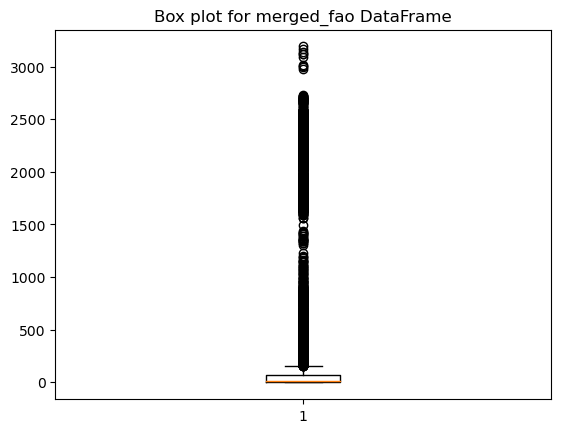

In [169]:
# box plots with matplotlib
plt.figure()
plt.boxplot(merged_fao.value)
plt.title('Box plot for merged_fao DataFrame')
plt.show()

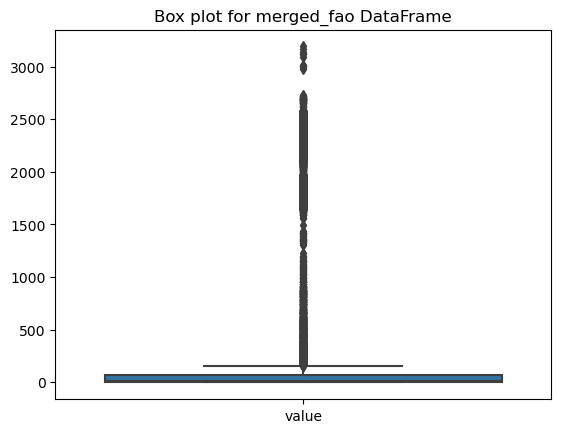

In [170]:
# box plots with seaborn
plt.figure()
sns.boxplot(data=merged_fao)
plt.title('Box plot for merged_fao DataFrame')
plt.show()

In [167]:
merged_fao.columns

Index(['area_code', 'area', 'item_code', 'item', 'element_code', 'element',
       'year', 'unit', 'value', 'flag_code', 'note', 'flag',
       'value_condition'],
      dtype='object')

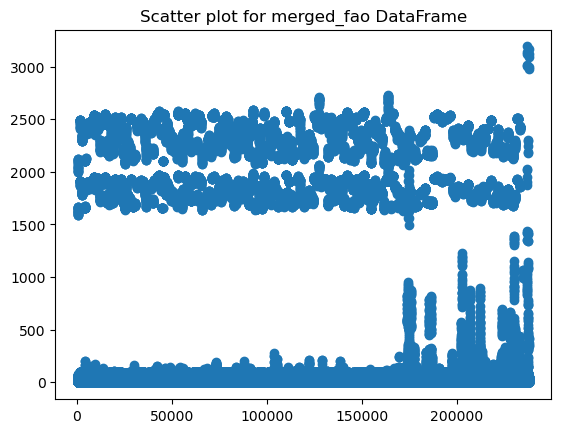

In [171]:
# scatter plot with matplotlib
plt.figure()
plt.scatter(x=merged_fao.index, y=merged_fao['value'])
plt.title('Scatter plot for merged_fao DataFrame')
plt.show()

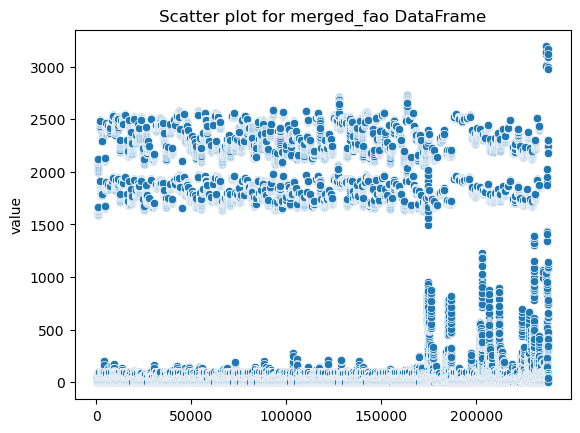

In [172]:
# scatter plot with seaborn
plt.figure()
sns.scatterplot(data=merged_fao, x=merged_fao.index, y='value')
plt.title('Scatter plot for merged_fao DataFrame')
plt.show()

# Food Prices for Nutrition - World Bank

'wb_Food_Prices_for_Nutrition.csv' dataset by World Bank

## Data Cleaning

In [48]:
# Copy-on-write (COW)
pd.options.mode.copy_on_write = True

In [49]:
# load the dataframe
wb_fpn = pd.read_csv('./final_datasets/wb_Food_Prices_for_Nutrition.csv', encoding='ISO-8859-1')
wb_fpn.head()

,Classification Name,Classification Code,Country Name,Country Code,Time,Time Code,Affordability of a healthy diet: ratio of cost to food expenditures [CoHD_fexp],Affordability of a healthy diet: ratio of cost to the food poverty line [CoHD_pov],Affordability of a nutrient adequate diet: ratio of cost to food expenditures [CoNA_fexp],Affordability of a nutrient adequate diet: ratio of cost to the food poverty line [CoNA_pov],...,Cost share for oils and fats in a least-cost healthy diet [CoHD_of_prop],Cost share for vegetables in a least-cost healthy diet [CoHD_v_prop],Cost share for starchy staples in a least-cost healthy diet [CoHD_ss_prop],Percent of the population who cannot afford sufficient calories [CoCA_headcount],Percent of the population who cannot afford nutrient adequacy [CoNA_headcount],Percent of the population who cannot afford a healthy diet [CoHD_headcount],Millions of people who cannot afford sufficient calories [CoCA_unafford_n],Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n],Millions of people who cannot afford a healthy diet [CoHD_unafford_n],Population [Pop]
0,Food Prices for Nutrition 1.0,FPN 1.0,Albania,ALB,2017,YR2017,0.425,3.992,0.266,2.496,...,0.023,0.179,0.152,0,13,37.8,0,0.4,1.1,2873457
1,Food Prices for Nutrition 1.0,FPN 1.0,Albania,ALB,2018,YR2018,..,4.092,..,..,...,..,..,..,..,..,27.9,..,..,0.8,2866376
2,Food Prices for Nutrition 1.0,FPN 1.0,Albania,ALB,2019,YR2019,..,4.159,..,..,...,..,..,..,..,..,19.8,..,..,0.6,2854191
3,Food Prices for Nutrition 1.0,FPN 1.0,Albania,ALB,2020,YR2020,..,4.239,..,..,...,..,..,..,..,..,20.1,..,..,0.6,2837743
4,Food Prices for Nutrition 1.0,FPN 1.0,Albania,ALB,2021,YR2021,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [50]:
wb_fpn.shape

(3720, 40)

In [51]:
wb_fpn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 40 columns):
 #   Column                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                      --------------  ----- 
 0   Classification Name                                                                                         3720 non-null   object
 1   Classification Code                                                                                         3720 non-null   object
 2   Country Name                                                                                                3720 non-null   object
 3   Country Code                                                                                                3720 non-null   object
 4   Time                                                                    

In [52]:
# drop columns not needed
wb_fpn.drop(columns=['Country Code', 'Time Code'], inplace=True)
wb_fpn.head()

,Classification Name,Classification Code,Country Name,Time,Affordability of a healthy diet: ratio of cost to food expenditures [CoHD_fexp],Affordability of a healthy diet: ratio of cost to the food poverty line [CoHD_pov],Affordability of a nutrient adequate diet: ratio of cost to food expenditures [CoNA_fexp],Affordability of a nutrient adequate diet: ratio of cost to the food poverty line [CoNA_pov],Affordability of an energy sufficient diet: ratio of cost to food expenditures [CoCA_fexp],Affordability of an energy sufficient diet: ratio of cost to the food poverty line [CoCA_pov],...,Cost share for oils and fats in a least-cost healthy diet [CoHD_of_prop],Cost share for vegetables in a least-cost healthy diet [CoHD_v_prop],Cost share for starchy staples in a least-cost healthy diet [CoHD_ss_prop],Percent of the population who cannot afford sufficient calories [CoCA_headcount],Percent of the population who cannot afford nutrient adequacy [CoNA_headcount],Percent of the population who cannot afford a healthy diet [CoHD_headcount],Millions of people who cannot afford sufficient calories [CoCA_unafford_n],Millions of people who cannot afford nutrient adequacy [CoNA_unafford_n],Millions of people who cannot afford a healthy diet [CoHD_unafford_n],Population [Pop]
0,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2017,0.425,3.992,0.266,2.496,0.078,0.732,...,0.023,0.179,0.152,0,13,37.8,0,0.4,1.1,2873457
1,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2018,..,4.092,..,..,..,..,...,..,..,..,..,..,27.9,..,..,0.8,2866376
2,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2019,..,4.159,..,..,..,..,...,..,..,..,..,..,19.8,..,..,0.6,2854191
3,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2020,..,4.239,..,..,..,..,...,..,..,..,..,..,20.1,..,..,0.6,2837743
4,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2021,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [53]:
# make remaining column titles lowercase & replace blank spaces with _
wb_fpn.columns=[col.lower().replace(" ","_") for col in wb_fpn.columns] #if col !='count' else 'total_rentals'
wb_fpn.columns

Index(['classification_name', 'classification_code', 'country_name', 'time',
       'affordability_of_a_healthy_diet:_ratio_of_cost_to_food_expenditures_[cohd_fexp]',
       'affordability_of_a_healthy_diet:_ratio_of_cost_to_the_food_poverty_line_[cohd_pov]',
       'affordability_of_a_nutrient_adequate_diet:_ratio_of_cost_to_food_expenditures_[cona_fexp]',
       'affordability_of_a_nutrient_adequate_diet:_ratio_of_cost_to_the_food_poverty_line_[cona_pov]',
       'affordability_of_an_energy_sufficient_diet:_ratio_of_cost_to_food_expenditures_[coca_fexp]',
       'affordability_of_an_energy_sufficient_diet:_ratio_of_cost_to_the_food_poverty_line_[coca_pov]',
       'cost_of_a_healthy_diet_[cohd]',
       'cost_of_a_healthy_diet_relative_to_the_cost_of_sufficient_energy_from_starchy_staples_[cohd_coca]',
       'cost_of_a_nutrient_adequate_diet_[cona]',
       'cost_of_an_energy_sufficient_diet_[coca]',
       'cost_of_animal-source_foods_[cohd_asf]',
       'cost_of_animal-sourced_foo

In [54]:
# changing/shortening remaining column names
wb_fpn.rename(columns={
    'country_name': 'country',
    'time': 'year',
    'affordability_of_a_healthy_diet:_ratio_of_cost_to_food_expenditures_[cohd_fexp]': 'affordability_healthy_diet_ratio_cost_to_food_expenditures',
    'affordability_of_a_healthy_diet:_ratio_of_cost_to_the_food_poverty_line_[cohd_pov]': 'affordability_healthy_diet_ratio_cost_to_food_poverty_line',
    'affordability_of_a_nutrient_adequate_diet:_ratio_of_cost_to_food_expenditures_[cona_fexp]': 'affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures',
    'affordability_of_a_nutrient_adequate_diet:_ratio_of_cost_to_the_food_poverty_line_[cona_pov]': 'affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line',
    'affordability_of_an_energy_sufficient_diet:_ratio_of_cost_to_food_expenditures_[coca_fexp]': 'affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures',
    'affordability_of_an_energy_sufficient_diet:_ratio_of_cost_to_the_food_poverty_line_[coca_pov]': 'affordability_energy_sufficient_diet_ratio_cost_food_poverty_line',
    'cost_of_a_healthy_diet_[cohd]': 'cost_healthy_diet',
    'cost_of_a_healthy_diet_relative_to_the_cost_of_sufficient_energy_from_starchy_staples_[cohd_coca]': 'cost_healthy_diet_relative_to_cost_of_sufficient_energy_from_starchy_staples',
    'cost_of_a_nutrient_adequate_diet_[cona]': 'cost_nutrient_adequate_diet',
    'cost_of_an_energy_sufficient_diet_[coca]': 'cost_energy_sufficient_diet',
    'cost_of_animal-source_foods_[cohd_asf]': 'cost_animal-source_foods',
    'cost_of_animal-sourced_foods_relative_to_the_starchy_staples_in_a_least-cost_healthy_diet_[cohd_asf_ss]': 'cost_animal-sourced_foods_relative_to_starchy_staples_in_least-cost_healthy_diet',
    'cost_of_fruits_[cohd_f]': 'cost_fruits',
    'cost_of_fruits_relative_to_the_starchy_staples_in_a_least-cost_healthy_diet_[cohd_f_ss]': 'cost_fruits_relative_to_starchy_staples_in_least-cost_healthy_diet',
    'cost_of_legumes,_nuts_and_seeds_[cohd_lns]': 'cost_legumes_nuts_seeds',
    'cost_of_legumes,_nuts_and_seeds_relative_to_the_starchy_staples_in_a_least-cost_healthy_diet_[cohd_lns_ss]': 'cost_legumes_nuts_seeds_relative_to_starchy_staples_in_least-cost_healthy_diet',
    'cost_of_oils_and_fats_[cohd_of]': 'cost_oils_fats',
    'cost_of_oils_and_fats_relative_to_the_starchy_staples_in_a_least-cost_healthy_diet_[cohd_of_ss]': 'cost_oils_fats_relative_to_starchy_staples_in_least-cost_healthy_diet',
    'cost_of_starchy_staples_[cohd_ss]': 'cost_starchy_staples',
    'cost_of_vegetables_[cohd_v]': 'cost_vegetables',
    'cost_of_vegetables_relative_to_the_starchy_staples_in_a_least-cost_healthy_diet_[cohd_v_ss]': 'cost_vegetables_relative_to_starchy_staples_in_least-cost_healthy_diet',   
    'cost_share_for_animal-sourced_foods_in_a_least-cost_healthy_diet_[cohd_asf_prop]':'cost_share_animal-sourced_foods_in_least-cost_healthy_diet',
    'cost_share_for_fruits_in_a_least-cost_healthy_diet_[cohd_f_prop]':'cost_share_fruits_in_least-cost_healthy_diet',
    'cost_share_for_legumes,_nuts_and_seeds_in_a_least-cost_healthy_diet_[cohd_lns_prop]':'cost_share_legumes_nuts_seeds_in_least-cost_healthy_diet',
    'cost_share_for_oils_and_fats_in_a_least-cost_healthy_diet_[cohd_of_prop]':'cost_share_oils_fats_in_least-cost_healthy_diet',
    'cost_share_for_vegetables_in_a_least-cost_healthy_diet_[cohd_v_prop]':'cost_share_vegetables_in_least-cost_healthy_diet',
    'cost_share_for_starchy_staples_in_a_least-cost_healthy_diet_[cohd_ss_prop]': 'cost_share_starchy_staples_in_least-cost_healthy_diet',
    'percent_of_the_population_who_cannot_afford_sufficient_calories_[coca_headcount]': 'percent_population_cannot_afford_sufficient_calories',
    'percent_of_the_population_who_cannot_afford_nutrient_adequacy_[cona_headcount]': 'percent_population_cannot_afford_nutrient_adequacy',
    'percent_of_the_population_who_cannot_afford_a_healthy_diet_[cohd_headcount]': 'percent_population_cannot_afford_healthy_diet',
    'millions_of_people_who_cannot_afford_sufficient_calories_[coca_unafford_n]': 'millions_people_cannot_afford_sufficient_calories',
    'millions_of_people_who_cannot_afford_nutrient_adequacy_[cona_unafford_n]': 'millions_people_cannot_afford_nutrient_adequacy',
    'millions_of_people_who_cannot_afford_a_healthy_diet_[cohd_unafford_n]': 'millions_people_cannot_afford_healthy_diet',
    'population_[pop]': 'population'
}, inplace=True)

In [55]:
wb_fpn.dtypes

classification_name                                                                 object
classification_code                                                                 object
country                                                                             object
year                                                                                 int64
affordability_healthy_diet_ratio_cost_to_food_expenditures                          object
affordability_healthy_diet_ratio_cost_to_food_poverty_line                          object
affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures                object
affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line                object
affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures                object
affordability_energy_sufficient_diet_ratio_cost_food_poverty_line                   object
cost_healthy_diet                                                                   object

In [56]:
# check for nulls
wb_fpn.isnull().sum()

classification_name                                                                 0
classification_code                                                                 0
country                                                                             0
year                                                                                0
affordability_healthy_diet_ratio_cost_to_food_expenditures                          0
affordability_healthy_diet_ratio_cost_to_food_poverty_line                          0
affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures                0
affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line                0
affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures                0
affordability_energy_sufficient_diet_ratio_cost_food_poverty_line                   0
cost_healthy_diet                                                                   0
cost_healthy_diet_relative_to_cost_of_sufficient_energ

In [57]:
wb_fpn.head(3)

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_expenditures,affordability_healthy_diet_ratio_cost_to_food_poverty_line,affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures,affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line,affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures,affordability_energy_sufficient_diet_ratio_cost_food_poverty_line,...,cost_share_oils_fats_in_least-cost_healthy_diet,cost_share_vegetables_in_least-cost_healthy_diet,cost_share_starchy_staples_in_least-cost_healthy_diet,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
0,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2017,0.425,3.992,0.266,2.496,0.078,0.732,...,0.023,0.179,0.152,0,13,37.8,0,0.4,1.1,2873457
1,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2018,..,4.092,..,..,..,..,...,..,..,..,..,..,27.9,..,..,0.8,2866376
2,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2019,..,4.159,..,..,..,..,...,..,..,..,..,..,19.8,..,..,0.6,2854191


In [58]:
len(wb_fpn.columns)

38

In [59]:
# No nulls in the World Bank dataset but lot's of blank rows/values
# Use numpy to replace '..' with NaN so I can see the nulls
wb_fpn.replace('..', np.nan, inplace=True)
wb_fpn.head(3)

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_expenditures,affordability_healthy_diet_ratio_cost_to_food_poverty_line,affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures,affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line,affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures,affordability_energy_sufficient_diet_ratio_cost_food_poverty_line,...,cost_share_oils_fats_in_least-cost_healthy_diet,cost_share_vegetables_in_least-cost_healthy_diet,cost_share_starchy_staples_in_least-cost_healthy_diet,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
0,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2017,0.425,3.992,0.266,2.496,0.078,0.732,...,0.023,0.179,0.152,0,13,37.8,0,0.4,1.1,2873457
1,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2018,NaN,4.092,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.9,NaN,NaN,0.8,2866376
2,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2019,NaN,4.159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.8,NaN,NaN,0.6,2854191


In [60]:
# Now checking nulls again
wb_fpn.isna().sum().sort_values()

classification_name                                                                    0
classification_code                                                                    0
country                                                                                0
year                                                                                   0
population                                                                           516
cost_healthy_diet                                                                    532
affordability_healthy_diet_ratio_cost_to_food_poverty_line                           628
percent_population_cannot_afford_healthy_diet                                        972
millions_people_cannot_afford_healthy_diet                                           972
cost_nutrient_adequate_diet                                                         2976
cost_energy_sufficient_diet                                                         2976
cost_vegetables      

In [61]:
#find rows where ALL columns are blank except for the ones to keep
keep_columns = ['classification_name', 'classification_code', 'country', 'year']
drop = (wb_fpn.drop(columns=keep_columns).isnull().all(axis=1)) & ~(wb_fpn[keep_columns].isnull().any(axis=1))
wb_fpn_clean = wb_fpn[~drop]

In [62]:
wb_fpn_clean.head()

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_expenditures,affordability_healthy_diet_ratio_cost_to_food_poverty_line,affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures,affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line,affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures,affordability_energy_sufficient_diet_ratio_cost_food_poverty_line,...,cost_share_oils_fats_in_least-cost_healthy_diet,cost_share_vegetables_in_least-cost_healthy_diet,cost_share_starchy_staples_in_least-cost_healthy_diet,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
0,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2017,0.425,3.992,0.266,2.496,0.078,0.732,...,0.023,0.179,0.152,0,13,37.8,0,0.4,1.1,2873457
1,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2018,NaN,4.092,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.9,NaN,NaN,0.8,2866376
2,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2019,NaN,4.159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.8,NaN,NaN,0.6,2854191
3,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2020,NaN,4.239,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.1,NaN,NaN,0.6,2837743
5,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2017,0.605,3.801,0.374,2.346,0.124,0.781,...,0.035,0.186,0.132,0.2,7.2,35.2,0.1,3,14.6,41389174


In [63]:
wb_fpn.classification_code.unique()

array(['FPN 1.0', 'FPN 1.1', 'FPN 2.0', 'FPN 2.1'], dtype=object)

### Altering Datatypes

In [64]:
# Changing Datatypes
# Convert the columns besides the excluded below to float64
exclude_columns = ['population', 'classification_name', 'classification_code', 'country', 'year']
for column in wb_fpn_clean.columns.difference(exclude_columns):
    wb_fpn_clean[column] = pd.to_numeric(wb_fpn_clean[column], errors='coerce')
# Convert population to Int64
wb_fpn_clean['population'] = pd.to_numeric(wb_fpn_clean['population']).astype('Int64')

In [65]:
wb_fpn_clean.dtypes

classification_name                                                                  object
classification_code                                                                  object
country                                                                              object
year                                                                                  int64
affordability_healthy_diet_ratio_cost_to_food_expenditures                          float64
affordability_healthy_diet_ratio_cost_to_food_poverty_line                          float64
affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures                float64
affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line                float64
affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures                float64
affordability_energy_sufficient_diet_ratio_cost_food_poverty_line                   float64
cost_healthy_diet                                                               

### Splitting the World Bank Food for Nutrition Dataset into 2

In [66]:
# split this into two datasets since we have one with only 2017 data

# Dataset with only 2017 data
first = wb_fpn_clean[wb_fpn_clean['year'] == 2017]

# Dataset with data other than 2017
second = wb_fpn_clean[wb_fpn_clean['year'] != 2017]

In [67]:
pd.DataFrame(first)

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_expenditures,affordability_healthy_diet_ratio_cost_to_food_poverty_line,affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures,affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line,affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures,affordability_energy_sufficient_diet_ratio_cost_food_poverty_line,...,cost_share_oils_fats_in_least-cost_healthy_diet,cost_share_vegetables_in_least-cost_healthy_diet,cost_share_starchy_staples_in_least-cost_healthy_diet,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
0,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2017,0.425,3.992,0.266,2.496,0.078,0.732,...,0.023,0.179,0.152,0.0,13.0,37.8,0.0,0.4,1.1,2873457
5,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2017,0.605,3.801,0.374,2.346,0.124,0.781,...,0.035,0.186,0.132,0.2,7.2,35.2,0.1,3.0,14.6,41389174
10,Food Prices for Nutrition 1.0,FPN 1.0,Angola,2017,0.972,4.371,0.726,3.264,0.315,1.417,...,0.038,0.277,0.194,57.2,87.1,92.9,17.0,26.0,27.7,29816769
15,Food Prices for Nutrition 1.0,FPN 1.0,Anguilla,2017,0.577,3.755,0.378,2.458,0.203,1.321,...,0.036,0.274,0.209,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
20,Food Prices for Nutrition 1.0,FPN 1.0,Antigua and Barbuda,2017,0.767,4.154,0.563,3.047,0.174,0.942,...,0.028,0.311,0.147,NaN,NaN,NaN,NaN,NaN,NaN,95425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,Food Prices for Nutrition 2.1,FPN 2.1,Vietnam,2017,1.052,3.202,0.737,2.245,0.286,0.871,...,0.053,0.215,0.162,0.7,11.7,24.9,0.7,11.0,23.4,94033048
3700,Food Prices for Nutrition 2.1,FPN 2.1,West Bank and Gaza,2017,0.845,2.984,0.445,1.572,0.284,1.004,...,0.037,0.169,0.194,0.6,2.4,18.0,0.0,0.1,0.8,4454805
3705,Food Prices for Nutrition 2.1,FPN 2.1,WORLD,2017,0.808,2.942,0.591,2.180,0.212,0.737,...,0.039,0.237,0.153,4.9,32.0,43.7,351.1,2293.8,3133.4,7262507298
3710,Food Prices for Nutrition 2.1,FPN 2.1,Zambia,2017,1.821,2.754,1.405,2.125,0.755,1.142,...,0.042,0.205,0.264,64.9,83.0,88.7,11.2,14.3,15.3,17298054


In [68]:
pd.DataFrame(second)

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_expenditures,affordability_healthy_diet_ratio_cost_to_food_poverty_line,affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures,affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line,affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures,affordability_energy_sufficient_diet_ratio_cost_food_poverty_line,...,cost_share_oils_fats_in_least-cost_healthy_diet,cost_share_vegetables_in_least-cost_healthy_diet,cost_share_starchy_staples_in_least-cost_healthy_diet,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
1,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2018,NaN,4.092,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.9,NaN,NaN,0.8,2866376
2,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2019,NaN,4.159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.8,NaN,NaN,0.6,2854191
3,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2020,NaN,4.239,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.1,NaN,NaN,0.6,2837743
6,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2018,NaN,3.861,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.9,NaN,NaN,14.3,42228415
7,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2019,NaN,3.834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.8,NaN,NaN,13.7,43053054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3709,Food Prices for Nutrition 2.1,FPN 2.1,WORLD,2021,NaN,3.269,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,41.7,NaN,NaN,3100.5,7518895609
3711,Food Prices for Nutrition 2.1,FPN 2.1,Zambia,2018,NaN,2.813,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,88.5,NaN,NaN,15.8,17835893
3712,Food Prices for Nutrition 2.1,FPN 2.1,Zambia,2019,NaN,2.897,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.0,NaN,NaN,16.3,18380477
3713,Food Prices for Nutrition 2.1,FPN 2.1,Zambia,2020,NaN,2.946,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,89.7,NaN,NaN,17.0,18927715


In [69]:
first.head()

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_expenditures,affordability_healthy_diet_ratio_cost_to_food_poverty_line,affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures,affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line,affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures,affordability_energy_sufficient_diet_ratio_cost_food_poverty_line,...,cost_share_oils_fats_in_least-cost_healthy_diet,cost_share_vegetables_in_least-cost_healthy_diet,cost_share_starchy_staples_in_least-cost_healthy_diet,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
0,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2017,0.425,3.992,0.266,2.496,0.078,0.732,...,0.023,0.179,0.152,0.0,13.0,37.8,0.0,0.4,1.1,2873457
5,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2017,0.605,3.801,0.374,2.346,0.124,0.781,...,0.035,0.186,0.132,0.2,7.2,35.2,0.1,3.0,14.6,41389174
10,Food Prices for Nutrition 1.0,FPN 1.0,Angola,2017,0.972,4.371,0.726,3.264,0.315,1.417,...,0.038,0.277,0.194,57.2,87.1,92.9,17.0,26.0,27.7,29816769
15,Food Prices for Nutrition 1.0,FPN 1.0,Anguilla,2017,0.577,3.755,0.378,2.458,0.203,1.321,...,0.036,0.274,0.209,NaN,NaN,NaN,NaN,NaN,NaN,<NA>
20,Food Prices for Nutrition 1.0,FPN 1.0,Antigua and Barbuda,2017,0.767,4.154,0.563,3.047,0.174,0.942,...,0.028,0.311,0.147,NaN,NaN,NaN,NaN,NaN,NaN,95425


In [70]:
first.shape

(744, 38)

In [71]:
second.head()

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_expenditures,affordability_healthy_diet_ratio_cost_to_food_poverty_line,affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures,affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line,affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures,affordability_energy_sufficient_diet_ratio_cost_food_poverty_line,...,cost_share_oils_fats_in_least-cost_healthy_diet,cost_share_vegetables_in_least-cost_healthy_diet,cost_share_starchy_staples_in_least-cost_healthy_diet,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
1,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2018,NaN,4.092,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27.9,NaN,NaN,0.8,2866376
2,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2019,NaN,4.159,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19.8,NaN,NaN,0.6,2854191
3,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2020,NaN,4.239,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,20.1,NaN,NaN,0.6,2837743
6,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2018,NaN,3.861,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33.9,NaN,NaN,14.3,42228415
7,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2019,NaN,3.834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,31.8,NaN,NaN,13.7,43053054


In [72]:
second.shape

(2472, 38)

In [73]:
first['country'] = first['country'].replace("CÃ´te d'Ivoire", "Côte d'Ivoire").replace("TÃ¼rkiye", "Turkey")
second['country'] = second['country'].replace("CÃ´te d'Ivoire", "Côte d'Ivoire").replace("TÃ¼rkiye", "Turkey")

### Handling Nulls for first data set

In [74]:
first.isnull().sum()

classification_name                                                                   0
classification_code                                                                   0
country                                                                               0
year                                                                                  0
affordability_healthy_diet_ratio_cost_to_food_expenditures                           44
affordability_healthy_diet_ratio_cost_to_food_poverty_line                           44
affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures                 24
affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line                 24
affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures                 24
affordability_energy_sufficient_diet_ratio_cost_food_poverty_line                    24
cost_healthy_diet                                                                    20
cost_healthy_diet_relative_to_co

In [75]:
second.columns

Index(['classification_name', 'classification_code', 'country', 'year',
       'affordability_healthy_diet_ratio_cost_to_food_expenditures',
       'affordability_healthy_diet_ratio_cost_to_food_poverty_line',
       'affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures',
       'affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line',
       'affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures',
       'affordability_energy_sufficient_diet_ratio_cost_food_poverty_line',
       'cost_healthy_diet',
       'cost_healthy_diet_relative_to_cost_of_sufficient_energy_from_starchy_staples',
       'cost_nutrient_adequate_diet', 'cost_energy_sufficient_diet',
       'cost_animal-source_foods',
       'cost_animal-sourced_foods_relative_to_starchy_staples_in_least-cost_healthy_diet',
       'cost_fruits',
       'cost_fruits_relative_to_starchy_staples_in_least-cost_healthy_diet',
       'cost_legumes_nuts_seeds',
       'cost_legumes_nuts_seeds_re

In [76]:
# drop the empty rows that have 124 as a value from the below columns for the first dataset (2017)
# since this is a crucial data point to have and not worth holding on to for the other columns data for the purpose of this project

#pd.options.mode.copy_on_write = True

first.dropna(subset=[
    'percent_population_cannot_afford_sufficient_calories',
    'percent_population_cannot_afford_nutrient_adequacy',
    'percent_population_cannot_afford_healthy_diet',
    'millions_people_cannot_afford_sufficient_calories',
    'millions_people_cannot_afford_nutrient_adequacy',
    'millions_people_cannot_afford_healthy_diet'
], inplace=True)

In [77]:
# now re-checking what nulls are left
first.isnull().sum()

classification_name                                                                  0
classification_code                                                                  0
country                                                                              0
year                                                                                 0
affordability_healthy_diet_ratio_cost_to_food_expenditures                          24
affordability_healthy_diet_ratio_cost_to_food_poverty_line                          24
affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures                24
affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line                24
affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures                24
affordability_energy_sufficient_diet_ratio_cost_food_poverty_line                   24
cost_healthy_diet                                                                    0
cost_healthy_diet_relative_to_cost_of_suffi

In [78]:
# Replaced NaN with the word 'Unknown'
first.fillna('Unknown', inplace=True)

In [79]:
first.isnull().sum()

classification_name                                                                 0
classification_code                                                                 0
country                                                                             0
year                                                                                0
affordability_healthy_diet_ratio_cost_to_food_expenditures                          0
affordability_healthy_diet_ratio_cost_to_food_poverty_line                          0
affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures                0
affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line                0
affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures                0
affordability_energy_sufficient_diet_ratio_cost_food_poverty_line                   0
cost_healthy_diet                                                                   0
cost_healthy_diet_relative_to_cost_of_sufficient_energ

### Handling Nulls for second data set

In [80]:
second.isnull().sum()

classification_name                                                                    0
classification_code                                                                    0
country                                                                                0
year                                                                                   0
affordability_healthy_diet_ratio_cost_to_food_expenditures                          2472
affordability_healthy_diet_ratio_cost_to_food_poverty_line                            80
affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures                2472
affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line                2472
affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures                2472
affordability_energy_sufficient_diet_ratio_cost_food_poverty_line                   2472
cost_healthy_diet                                                                      8
cost_healthy_diet_rel

In [81]:
# drop the columns for the second dataset (2018-2021) where columns are completely empty 
# (aka columns with 2472 null values)
second.drop(columns=second.columns[second.isnull().sum() == 2472], inplace=True)
second.head()

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_poverty_line,cost_healthy_diet,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_healthy_diet,population
1,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2018,4.092,4.051,27.9,0.8,2866376
2,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2019,4.159,4.117,19.8,0.6,2854191
3,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2020,4.239,4.197,20.1,0.6,2837743
6,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2018,3.861,3.822,33.9,14.3,42228415
7,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2019,3.834,3.796,31.8,13.7,43053054


In [82]:
# The remaining nulls in the second dataset
second.isnull().sum()

classification_name                                             0
classification_code                                             0
country                                                         0
year                                                            0
affordability_healthy_diet_ratio_cost_to_food_poverty_line     80
cost_healthy_diet                                               8
percent_population_cannot_afford_healthy_diet                 344
millions_people_cannot_afford_healthy_diet                    344
population                                                      0
dtype: int64

<Axes: xlabel='index'>

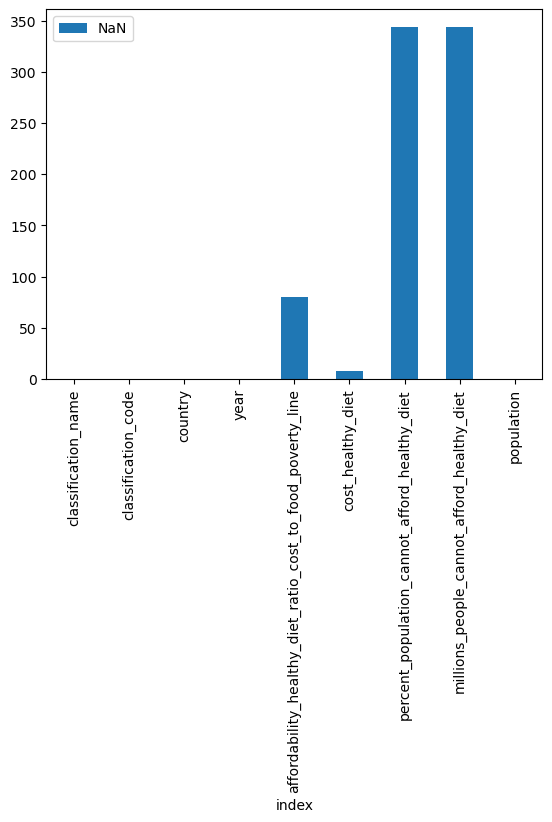

In [83]:
# Visualizing these nulls in a bar chart
second.isna().sum().reset_index(name="NaN").plot.bar(x='index', y='NaN')

In [84]:
# Delete null rows in these 3 columns
second.dropna(subset=['cost_healthy_diet', 
                      'percent_population_cannot_afford_healthy_diet',
                      'millions_people_cannot_afford_healthy_diet'], inplace=True)

'cost_of_a_healthy_diet_[cohd]': 8 null rows for Argentina and Zimbabwe 2018-2021 in FPN 2.0 have no data except in the Population column

Also dropped these two column's 336 null rows because its not giving us any data, without these 2 critical column's data, we only would have population size and the typical cost of a healthy diet and affordability of a healthy diet in this country:
'percent_of_the_population_who_cannot_afford_a_healthy_diet_[cohd_headcount]'
'millions_of_people_who_cannot_afford_a_healthy_diet_[cohd_unafford_n]'

In [85]:
second.isnull().sum()

classification_name                                            0
classification_code                                            0
country                                                        0
year                                                           0
affordability_healthy_diet_ratio_cost_to_food_poverty_line    72
cost_healthy_diet                                              0
percent_population_cannot_afford_healthy_diet                  0
millions_people_cannot_afford_healthy_diet                     0
population                                                     0
dtype: int64

World Bank data: CPI 2018: 1.04, 2019: 1.06, and 2020: 1.08. Since I have this data, choosing to impute for the 72 nulls in 'affordability_healthy_diet_ratio_cost_to_food_poverty_line' for the Ratio of 'cost_healthy_diet' column to Food poverty line per year below.

In [86]:
# Impute for the 72 nulls in 'affordability_healthy_diet_ratio_cost_to_food_poverty_line' 
# Ratio of 'cost_healthy_diet'column to Food poverty line per year
# function to calculate affordability ratio
def calculate_affordability_ratio(row):
    if pd.notnull(row['affordability_healthy_diet_ratio_cost_to_food_poverty_line']):
        return row['affordability_healthy_diet_ratio_cost_to_food_poverty_line']
    elif row['year'] == 2018:
        return row['cost_healthy_diet'] / 1.16
    elif row['year'] == 2019:
        return row['cost_healthy_diet'] / 1.12
    elif row['year'] == 2020:
        return row['cost_healthy_diet'] / 1.15
    else:
        return None
    
second['affordability_healthy_diet_ratio_cost_to_food_poverty_line'] = second.apply(calculate_affordability_ratio, axis=1)

In [87]:
second.isna().sum()

classification_name                                           0
classification_code                                           0
country                                                       0
year                                                          0
affordability_healthy_diet_ratio_cost_to_food_poverty_line    0
cost_healthy_diet                                             0
percent_population_cannot_afford_healthy_diet                 0
millions_people_cannot_afford_healthy_diet                    0
population                                                    0
dtype: int64

### Saving work into 2 final datasets

In [88]:
# saving the two split datasets

first.to_csv('./final_datasets/wb_food_prices_for_nutrition_cleaned_2017.csv', index=False)
second.to_csv('./final_datasets/wb_food_prices_for_nutrition_cleaned_2018_2021.csv', index=False)

## Exploratory Data Analysis

### "first" dataframe

In [89]:
first.head(3) 

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_expenditures,affordability_healthy_diet_ratio_cost_to_food_poverty_line,affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures,affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line,affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures,affordability_energy_sufficient_diet_ratio_cost_food_poverty_line,...,cost_share_oils_fats_in_least-cost_healthy_diet,cost_share_vegetables_in_least-cost_healthy_diet,cost_share_starchy_staples_in_least-cost_healthy_diet,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
0,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2017,0.425,3.992,0.266,2.496,0.078,0.732,...,0.023,0.179,0.152,0.0,13.0,37.8,0.0,0.4,1.1,2873457
5,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2017,0.605,3.801,0.374,2.346,0.124,0.781,...,0.035,0.186,0.132,0.2,7.2,35.2,0.1,3.0,14.6,41389174
10,Food Prices for Nutrition 1.0,FPN 1.0,Angola,2017,0.972,4.371,0.726,3.264,0.315,1.417,...,0.038,0.277,0.194,57.2,87.1,92.9,17.0,26.0,27.7,29816769


In [90]:
#descriptive statistics one first dataset
first.describe()

,year,cost_healthy_diet,cost_nutrient_adequate_diet,cost_energy_sufficient_diet,cost_animal-source_foods,cost_fruits,cost_legumes_nuts_seeds,cost_oils_fats,cost_starchy_staples,cost_vegetables,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
count,620.0,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.0
mean,2017.0,3.267257,2.370113,0.790761,0.879155,0.660258,0.341079,0.126361,0.487126,0.770403,6.933065,27.531774,37.424355,9.243226,58.572258,80.211613,186430756.782258
std,0.0,0.613994,0.518251,0.328560,0.211354,0.247766,0.149424,0.047185,0.174649,0.254595,13.462474,29.159310,34.572739,41.184856,254.009743,344.723374,716930800.369452
min,2017.0,1.822000,0.709000,0.239000,0.368000,0.162000,0.069000,0.052000,0.147000,0.303000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95843.0
25%,2017.0,2.863000,2.015000,0.604000,0.735000,0.518000,0.232000,0.089000,0.388000,0.597000,0.100000,1.400000,3.000000,0.000000,0.100000,0.200000,4124531.0
50%,2017.0,3.184000,2.295500,0.770500,0.882000,0.628000,0.329000,0.127000,0.477500,0.751000,0.900000,15.500000,24.800000,0.100000,1.450000,2.100000,11811443.0
75%,2017.0,3.581000,2.620000,0.975000,1.015000,0.790000,0.409000,0.159000,0.565000,0.892000,6.975000,54.600000,75.000000,2.000000,11.575000,16.425000,51361911.0
max,2017.0,5.975000,4.242000,2.958000,1.583000,1.997000,0.875000,0.321000,1.477000,1.781000,78.500000,96.000000,97.500000,381.200000,2293.800000,3133.400000,7262507298.0


In [91]:
first['percent_population_cannot_afford_healthy_diet'].mean()

37.424354838709675

In [115]:
# Extract the list of countries that have a below average population % that cannot afford a healthy diet
countries_below_average = first[first['percent_population_cannot_afford_healthy_diet'] < 37.424354838709675].groupby('classification_code')['country'].apply(list).reset_index(name='countries_below_average')
countries_below_average

,classification_code,countries_below_average
0,FPN 1.0,"[Algeria, Argentina, Australia, Austria, Azerb..."
1,FPN 1.1,"[Albania, Algeria, Argentina, Armenia, Austral..."
2,FPN 2.0,"[Albania, Algeria, Argentina, Armenia, Austral..."
3,FPN 2.1,"[Albania, Algeria, Argentina, Armenia, Austral..."


In [93]:
total_countries_below_average = first[first['percent_population_cannot_afford_healthy_diet'] < 37.424354838709675].groupby('classification_code')['country'].count()
total_countries_below_average

classification_code
FPN 1.0    85
FPN 1.1    89
FPN 2.0    89
FPN 2.1    89
Name: country, dtype: int64

In [94]:
len(countries_below_average) # 352 countries

4

In [96]:
first.columns

Index(['classification_name', 'classification_code', 'country', 'year',
       'affordability_healthy_diet_ratio_cost_to_food_expenditures',
       'affordability_healthy_diet_ratio_cost_to_food_poverty_line',
       'affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures',
       'affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line',
       'affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures',
       'affordability_energy_sufficient_diet_ratio_cost_food_poverty_line',
       'cost_healthy_diet',
       'cost_healthy_diet_relative_to_cost_of_sufficient_energy_from_starchy_staples',
       'cost_nutrient_adequate_diet', 'cost_energy_sufficient_diet',
       'cost_animal-source_foods',
       'cost_animal-sourced_foods_relative_to_starchy_staples_in_least-cost_healthy_diet',
       'cost_fruits',
       'cost_fruits_relative_to_starchy_staples_in_least-cost_healthy_diet',
       'cost_legumes_nuts_seeds',
       'cost_legumes_nuts_seeds_re

In [119]:
first[[
    'classification_code',
       'affordability_healthy_diet_ratio_cost_to_food_expenditures',
       'affordability_healthy_diet_ratio_cost_to_food_poverty_line',
       'affordability_nutrient_adequate_diet_ratio_cost_to_food_expenditures',
       'affordability_nutrient_adequate_diet_ratio_cost_to_food_poverty_line',
       'affordability_energy_sufficient_diet_ratio_cost_to_food_expenditures',
       'affordability_energy_sufficient_diet_ratio_cost_food_poverty_line',
       'cost_healthy_diet',
       'cost_healthy_diet_relative_to_cost_of_sufficient_energy_from_starchy_staples',
       'cost_nutrient_adequate_diet', 'cost_energy_sufficient_diet',
       'cost_animal-source_foods',
       'cost_animal-sourced_foods_relative_to_starchy_staples_in_least-cost_healthy_diet',
       'cost_fruits',
       'cost_fruits_relative_to_starchy_staples_in_least-cost_healthy_diet',
       'cost_legumes_nuts_seeds',
       'cost_legumes_nuts_seeds_relative_to_starchy_staples_in_least-cost_healthy_diet',
       'cost_oils_fats',
       'cost_oils_fats_relative_to_starchy_staples_in_least-cost_healthy_diet',
       'cost_starchy_staples', 'cost_vegetables',
       'cost_vegetables_relative_to_starchy_staples_in_least-cost_healthy_diet',
       'cost_share_animal-sourced_foods_in_least-cost_healthy_diet',
       'cost_share_fruits_in_least-cost_healthy_diet',
       'cost_share_legumes_nuts_seeds_in_least-cost_healthy_diet',
       'cost_share_oils_fats_in_least-cost_healthy_diet',
       'cost_share_vegetables_in_least-cost_healthy_diet',
       'cost_share_starchy_staples_in_least-cost_healthy_diet',
       'percent_population_cannot_afford_sufficient_calories',
       'percent_population_cannot_afford_nutrient_adequacy',
       'percent_population_cannot_afford_healthy_diet',
       'millions_people_cannot_afford_sufficient_calories',
       'millions_people_cannot_afford_nutrient_adequacy',
       'millions_people_cannot_afford_healthy_diet'
]].groupby(['classification_code']).mean(numeric_only=True)

,cost_healthy_diet,cost_nutrient_adequate_diet,cost_energy_sufficient_diet,cost_animal-source_foods,cost_fruits,cost_legumes_nuts_seeds,cost_oils_fats,cost_starchy_staples,cost_vegetables,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet
classification_code,,,,,,,,,,,,,,,
FPN 1.0,3.271510,2.375445,0.792529,0.881103,0.661329,0.341746,0.126658,0.488245,0.772458,7.695484,28.754194,38.319355,9.837419,57.089032,78.693548
FPN 1.1,3.271510,2.375445,0.792529,0.881103,0.661329,0.341746,0.126658,0.488245,0.772458,6.710323,27.492903,37.116774,9.047742,59.042581,80.647742
FPN 2.0,3.263004,2.364781,0.788994,0.877206,0.659187,0.340411,0.126065,0.486006,0.768348,6.660645,26.895484,37.058065,9.027097,58.962581,80.643226
FPN 2.1,3.263004,2.364781,0.788994,0.877206,0.659187,0.340411,0.126065,0.486006,0.768348,6.665806,26.984516,37.203226,9.060645,59.194839,80.861935


In [122]:
first.groupby(first['classification_code'] == 'FPN 2.1').mean(numeric_only=True)

,year,cost_healthy_diet,cost_nutrient_adequate_diet,cost_energy_sufficient_diet,cost_animal-source_foods,cost_fruits,cost_legumes_nuts_seeds,cost_oils_fats,cost_starchy_staples,cost_vegetables,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
classification_code,,,,,,,,,,,,,,,,,
False,2017.0,3.268675,2.371890,0.791351,0.879804,0.660615,0.341301,0.126460,0.487499,0.771088,7.022151,27.714194,37.498065,9.304086,58.364731,79.994839,186314188.896774
True,2017.0,3.263004,2.364781,0.788994,0.877206,0.659187,0.340411,0.126065,0.486006,0.768348,6.665806,26.984516,37.203226,9.060645,59.194839,80.861935,186780460.43871


In [140]:
filtered_df = first[first['classification_code'] == 'FPN 2.1']
top_5_countries = filtered_df.groupby('country').mean(numeric_only=True) #.nlargest(5, columns='your_column_name')


In [141]:
top_5_countries_sorted = top_5_countries.sort_values(ascending=False, by='country').head(6)

top_5_countries_sorted

,year,cost_healthy_diet,cost_nutrient_adequate_diet,cost_energy_sufficient_diet,cost_animal-source_foods,cost_fruits,cost_legumes_nuts_seeds,cost_oils_fats,cost_starchy_staples,cost_vegetables,percent_population_cannot_afford_sufficient_calories,percent_population_cannot_afford_nutrient_adequacy,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_sufficient_calories,millions_people_cannot_afford_nutrient_adequacy,millions_people_cannot_afford_healthy_diet,population
country,,,,,,,,,,,,,,,,,
Zimbabwe,2017.0,2.199685,0.709,0.239,0.368,0.199,0.12800,0.056,0.213,0.375,0.0,10.6,67.8,0.0,1.6,10.0,14751101.0
Zambia,2017.0,3.085000,2.380,1.279,0.906,0.372,0.23200,0.130,0.814,0.631,64.9,83.0,88.7,11.2,14.3,15.3,17298054.0
West Bank and Gaza,2017.0,3.342000,1.761,1.124,1.127,0.695,0.18669,0.122,0.649,0.564,0.6,2.4,18.0,0.0,0.1,0.8,4454805.0
WORLD,2017.0,3.295000,2.441,0.825,0.872,0.658,0.34600,0.129,0.503,0.782,4.9,32.0,43.7,351.1,2293.8,3133.4,7262507298.0
Vietnam,2017.0,3.586000,2.514,0.975,1.183,0.556,0.30500,0.189,0.582,0.771,0.7,11.7,24.9,0.7,11.0,23.4,94033048.0
Uruguay,2017.0,3.073000,2.129,0.694,0.615,0.537,0.48700,0.068,0.378,0.989,0.0,0.8,2.8,0.0,0.0,0.1,3422200.0


In [127]:
first.shape

(620, 38)

### "second" dataframe

In [98]:
second.head()

,classification_name,classification_code,country,year,affordability_healthy_diet_ratio_cost_to_food_poverty_line,cost_healthy_diet,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_healthy_diet,population
1,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2018,4.092,4.051,27.9,0.8,2866376
2,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2019,4.159,4.117,19.8,0.6,2854191
3,Food Prices for Nutrition 1.0,FPN 1.0,Albania,2020,4.239,4.197,20.1,0.6,2837743
6,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2018,3.861,3.822,33.9,14.3,42228415
7,Food Prices for Nutrition 1.0,FPN 1.0,Algeria,2019,3.834,3.796,31.8,13.7,43053054


In [99]:
second.describe()

,year,affordability_healthy_diet_ratio_cost_to_food_poverty_line,cost_healthy_diet,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_healthy_diet,population
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2128.0
mean,2019.285714,3.137818,3.428983,36.514474,80.059117,193476010.851034
std,1.030400,0.646569,0.688075,34.240808,340.960227,736979582.959788
min,2018.000000,1.672000,1.873000,0.000000,0.000000,96762.0
25%,2018.000000,2.713000,2.986000,2.300000,0.200000,4145902.0
50%,2019.000000,3.044000,3.352000,22.400000,1.900000,11936162.0
75%,2020.000000,3.462250,3.776500,71.800000,17.500000,52750914.0
max,2021.000000,6.748000,7.033000,97.800000,3191.900000,7519145737.0


In [123]:
# The average cost of a healthy diet
second[['affordability_healthy_diet_ratio_cost_to_food_poverty_line', 'cost_healthy_diet','percent_population_cannot_afford_healthy_diet','millions_people_cannot_afford_healthy_diet']].describe()

,affordability_healthy_diet_ratio_cost_to_food_poverty_line,cost_healthy_diet,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_healthy_diet
count,2128.000000,2128.000000,2128.000000,2128.000000
mean,3.137818,3.428983,36.514474,80.059117
std,0.646569,0.688075,34.240808,340.960227
min,1.672000,1.873000,0.000000,0.000000
25%,2.713000,2.986000,2.300000,0.200000
50%,3.044000,3.352000,22.400000,1.900000
75%,3.462250,3.776500,71.800000,17.500000
max,6.748000,7.033000,97.800000,3191.900000


In [101]:
second[['year', 'percent_population_cannot_afford_healthy_diet']].groupby(['year']).describe()

percent_population_cannot_afford_healthy_diet                             \
                                             count       mean        std  min   
year                                                                            
2018                                         608.0  36.505757  34.276041  0.0   
2019                                         608.0  36.060362  34.017243  0.0   
2020                                         608.0  36.924178  34.299915  0.0   
2021                                         304.0  36.620724  34.653971  0.0   

                                 
        25%    50%    75%   max  
year                             
2018  2.400  22.40  72.50  97.3  
2019  2.100  21.35  69.95  97.1  
2020  2.425  23.20  71.80  97.8  
2021  2.150  22.40  73.00  97.8

In [162]:
filtered_df = first[first['classification_code'] == 'FPN 2.1']
filtered_df[['country', 'millions_people_cannot_afford_healthy_diet']].groupby(['country']).mean().sort_values(ascending=False, by='country')

,millions_people_cannot_afford_healthy_diet
country,
Zimbabwe,10.0
Zambia,15.3
West Bank and Gaza,0.8
WORLD,3133.4
Vietnam,23.4
...,...
Armenia,1.1
Argentina,3.0
Angola,24.6


In [156]:
filtered_df.millions_people_cannot_afford_healthy_diet.sum()

12533.6

In [124]:
second.groupby(['year']).mean(numeric_only=True)

,affordability_healthy_diet_ratio_cost_to_food_poverty_line,cost_healthy_diet,percent_population_cannot_afford_healthy_diet,millions_people_cannot_afford_healthy_diet,population
year,,,,,
2018,3.054551,3.325369,36.505757,79.108388,190912574.985197
2019,3.114923,3.386955,36.060362,78.356579,192933321.950658
2020,3.195470,3.477615,36.924178,81.738980,194874761.478618
2021,3.234836,3.623000,36.620724,82.005921,196890759.128289


In [126]:
second.shape

(2128, 9)

In [163]:
second.country.unique()

array(['Albania', 'Algeria', 'Angola', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Belize',
       'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominican Republic',
       'East Asia & Pacific', 'Ecuador', 'Egypt, Arab Rep.', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe & Central Asia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia, The', 'Germany', 'Ghana', 'Greece',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'High income',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jord